In [3]:
%matplotlib inline

/home/ubuntu/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [10]:
path = "data/dogscats/sample/"

In [2]:
batch_size = 64

In [5]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
from matplotlib import pyplot as plt

In [6]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [7]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [8]:
vgg = Vgg16()

16384/35363 [============>.................] - ETA: 0s

In [11]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 16 images belonging to 2 classes.


In [14]:
imgs, labels = next(batches)

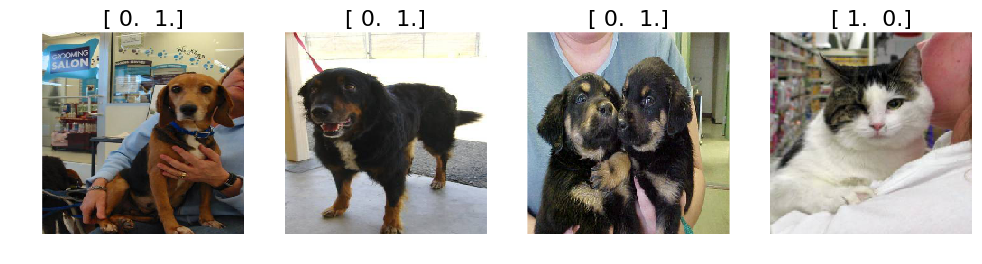

In [15]:
plots(imgs, titles = labels)

In [16]:
vgg.predict(imgs, True)

(array([ 0.2652,  0.7083,  0.9111,  0.1022], dtype=float32),
 array([237, 244, 244, 728]),
 [u'miniature_pinscher',
  u'Tibetan_mastiff',
  u'Tibetan_mastiff',
  u'plastic_bag'])

In [17]:
vgg.classes[:3]

[u'tench', u'goldfish', u'great_white_shark']

In [20]:
batches=vgg.get_batches(path+'train',batch_size=batch_size)
valbatches = vgg.get_batches(path+'valid',batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [21]:
vgg.finetune(batches)

In [24]:
vgg.fit(batches, valbatches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 2.8875 - acc: 0.3750 - val_loss: 1.1986 - val_acc: 0.5000
